In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("data_superstar_v1_0.csv", delimiter=",")
data['date'] = pd.to_datetime(data['release_date'])
data.sort_values(by="date", inplace=True)

split_day = data["date"].iloc[-1] - pd.DateOffset(years=1)
data_train = data[(data["date"] < split_day)].copy()

In [2]:
columns = ["hit", "pagerank_x", "pagerank_y", "success_rate_x", "success_rate_y", "hits_in_past_x", "hits_in_past_y", "superstar_v5_x", "superstar_v5_y"]
#columns = ["degree_x", "weighted degree_x", "eccentricity_x", "closnesscentrality_x", "clustering_x", "betweenesscentrality_x", "eigencentrality_x","degree_y", "weighted degree_y", "eccentricity_y", "closnesscentrality_y", "clustering_y", "betweenesscentrality_y", "eigencentrality_y", "hit"]

Correlation Matrix:
                     hit  pagerank_x  pagerank_y  success_rate_x  \
hit             1.000000   -0.005724   -0.006576        0.186334   
pagerank_x     -0.005724    1.000000    0.114017        0.017770   
pagerank_y     -0.006576    0.114017    1.000000        0.030613   
success_rate_x  0.186334    0.017770    0.030613        1.000000   
success_rate_y  0.000630    0.052050    0.126223        0.063551   
hits_in_past_x  0.151309    0.054400    0.038446        0.604759   
hits_in_past_y -0.001971    0.068351    0.195888        0.057944   
superstar_v5_x -0.124637   -0.085015   -0.060079       -0.611950   
superstar_v5_y  0.003631   -0.103378   -0.314317       -0.080423   

                success_rate_y  hits_in_past_x  hits_in_past_y  \
hit                   0.000630        0.151309       -0.001971   
pagerank_x            0.052050        0.054400        0.068351   
pagerank_y            0.126223        0.038446        0.195888   
success_rate_x        0.063551     

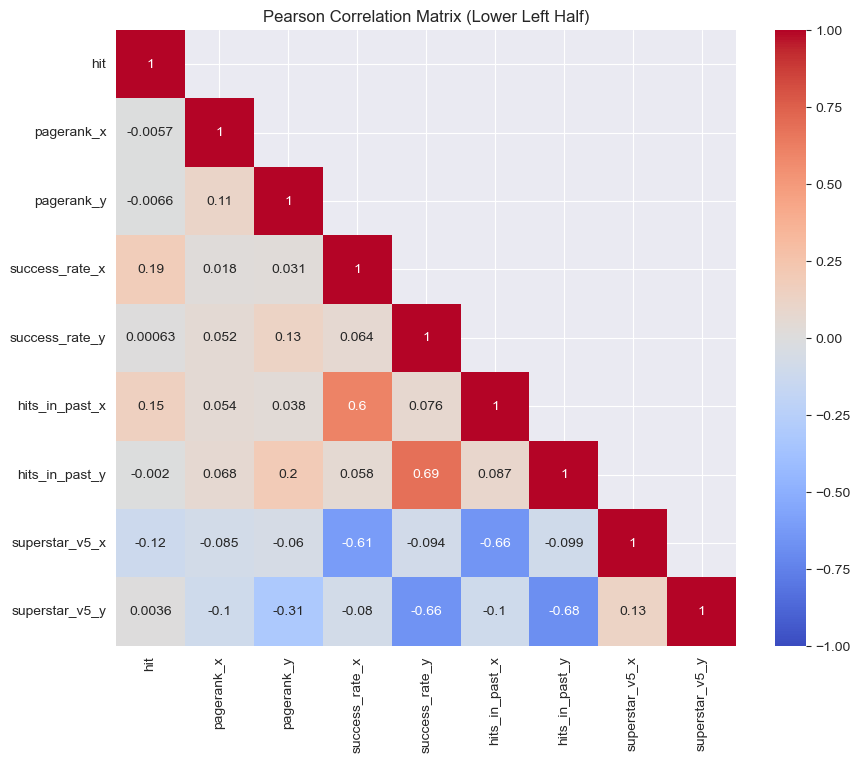

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `data` is your DataFrame and `columns` is the list of columns you want to consider
correlation_matrix = data_train[columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix (Lower Left Half)')
plt.show()

Correlation Matrix:
                     hit  pagerank_x  pagerank_y  success_rate_x  \
hit             1.000000    0.016214   -0.015340        0.114921   
pagerank_x      0.016214    1.000000    0.344086        0.220269   
pagerank_y     -0.015340    0.344086    1.000000        0.087266   
success_rate_x  0.114921    0.220269    0.087266        1.000000   
success_rate_y -0.003764    0.119366    0.329356        0.130137   
hits_in_past_x  0.112749    0.220984    0.084468        0.998346   
hits_in_past_y -0.003769    0.119405    0.329385        0.130192   
superstar_v5_x -0.114000   -0.220572   -0.085640       -0.998674   
superstar_v5_y  0.003780   -0.119399   -0.329382       -0.130193   

                success_rate_y  hits_in_past_x  hits_in_past_y  \
hit                  -0.003764        0.112749       -0.003769   
pagerank_x            0.119366        0.220984        0.119405   
pagerank_y            0.329356        0.084468        0.329385   
success_rate_x        0.130137     

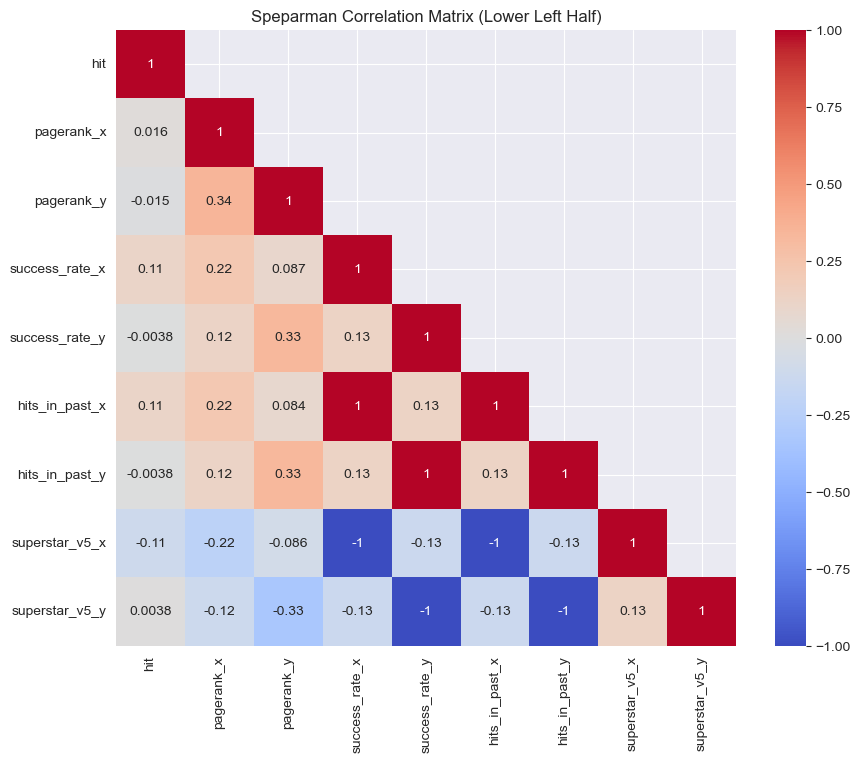

In [4]:
correlation_matrix = data_train[columns].corr(method="spearman")

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Speparman Correlation Matrix (Lower Left Half)')
plt.show()

why is pagerank_x negatively correlated???
maybe because less successfullartists with hit artist coop?

In [5]:
df_one_hot = pd.get_dummies(data_train, columns=['Cluster_x', "Cluster_y"], drop_first=True)
df_one_hot

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,Cluster_x_1,Cluster_x_2,Cluster_x_3,Cluster_x_4,Cluster_x_5,Cluster_y_0.0,Cluster_y_2.0,Cluster_y_3.0,Cluster_y_4.0,Cluster_y_5.0
0,3rTIDlmlGskGnRRqmRtvYn,Lone Stranger,0.0,False,Solo,19.0,1.0,74.0,2013-08-26,163255.0,...,True,False,False,False,False,False,False,False,False,False
64,7fq0d4gJ0MizFcdK7zhddn,Goodbye Lovers and Friends,33.0,False,Solo,10.0,1.0,77.0,2013-08-26,195707.0,...,False,False,False,False,False,False,False,False,False,False
63,6NlE71TbUglmKQVLhE1H8R,Evil Eye,52.0,True,Solo,2.0,1.0,77.0,2013-08-26,167253.0,...,False,False,False,False,False,False,False,False,False,False
62,7mexukWpLrCVwAztkM8kQl,Stand On the Horizon,46.0,False,Solo,4.0,1.0,77.0,2013-08-26,263120.0,...,False,False,False,False,False,False,False,False,False,False
61,6hADH7b57N5666cGv624vg,Right Action,44.0,False,Solo,1.0,1.0,77.0,2013-08-26,182280.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302833,4BLEnHP1FInl1u3xAbgI4n,Lullaby,65.0,False,Collaboration,15.0,2.0,75.0,2018-08-25,160184.0,...,False,False,False,False,False,True,False,False,False,False
302834,4p7fb6fjHMcyEebumewT2p,Back to You,34.0,False,Collaboration,13.0,2.0,75.0,2018-08-25,200323.0,...,False,False,False,False,False,True,False,False,False,False
302835,67ERfxHkUp2TPlVU9dAjox,Whiplash,38.0,False,Collaboration,10.0,2.0,75.0,2018-08-25,183913.0,...,False,False,False,False,False,True,False,False,False,False
302836,0FkqXwZLBMFH9VWhJTtlJo,Incy Wincy Spider,0.0,False,Solo,17.0,1.0,79.0,2018-08-25,95930.0,...,True,False,False,False,False,False,False,False,False,False


In [6]:
one_hot_columns = [col for col in df_one_hot.columns if col not in data_train.columns]

In [7]:
columns.extend(one_hot_columns)
columns

['hit',
 'pagerank_x',
 'pagerank_y',
 'success_rate_x',
 'success_rate_y',
 'hits_in_past_x',
 'hits_in_past_y',
 'superstar_v5_x',
 'superstar_v5_y',
 'Cluster_x_1',
 'Cluster_x_2',
 'Cluster_x_3',
 'Cluster_x_4',
 'Cluster_x_5',
 'Cluster_y_0.0',
 'Cluster_y_2.0',
 'Cluster_y_3.0',
 'Cluster_y_4.0',
 'Cluster_y_5.0']

Correlation Matrix:
                     hit  pagerank_x  pagerank_y  success_rate_x  \
hit             1.000000   -0.005724   -0.006576        0.186334   
pagerank_x     -0.005724    1.000000    0.114017        0.017770   
pagerank_y     -0.006576    0.114017    1.000000        0.030613   
success_rate_x  0.186334    0.017770    0.030613        1.000000   
success_rate_y  0.000630    0.052050    0.126223        0.063551   
hits_in_past_x  0.151309    0.054400    0.038446        0.604759   
hits_in_past_y -0.001971    0.068351    0.195888        0.057944   
superstar_v5_x -0.124637   -0.085015   -0.060079       -0.611950   
superstar_v5_y  0.003631   -0.103378   -0.314317       -0.080423   
Cluster_x_1    -0.020273   -0.351442   -0.118680       -0.128015   
Cluster_x_2     0.002793   -0.023638    0.080502       -0.014579   
Cluster_x_3    -0.031335    0.121984   -0.036543       -0.063177   
Cluster_x_4     0.006722   -0.023561   -0.010080       -0.011597   
Cluster_x_5    -0.007295   -

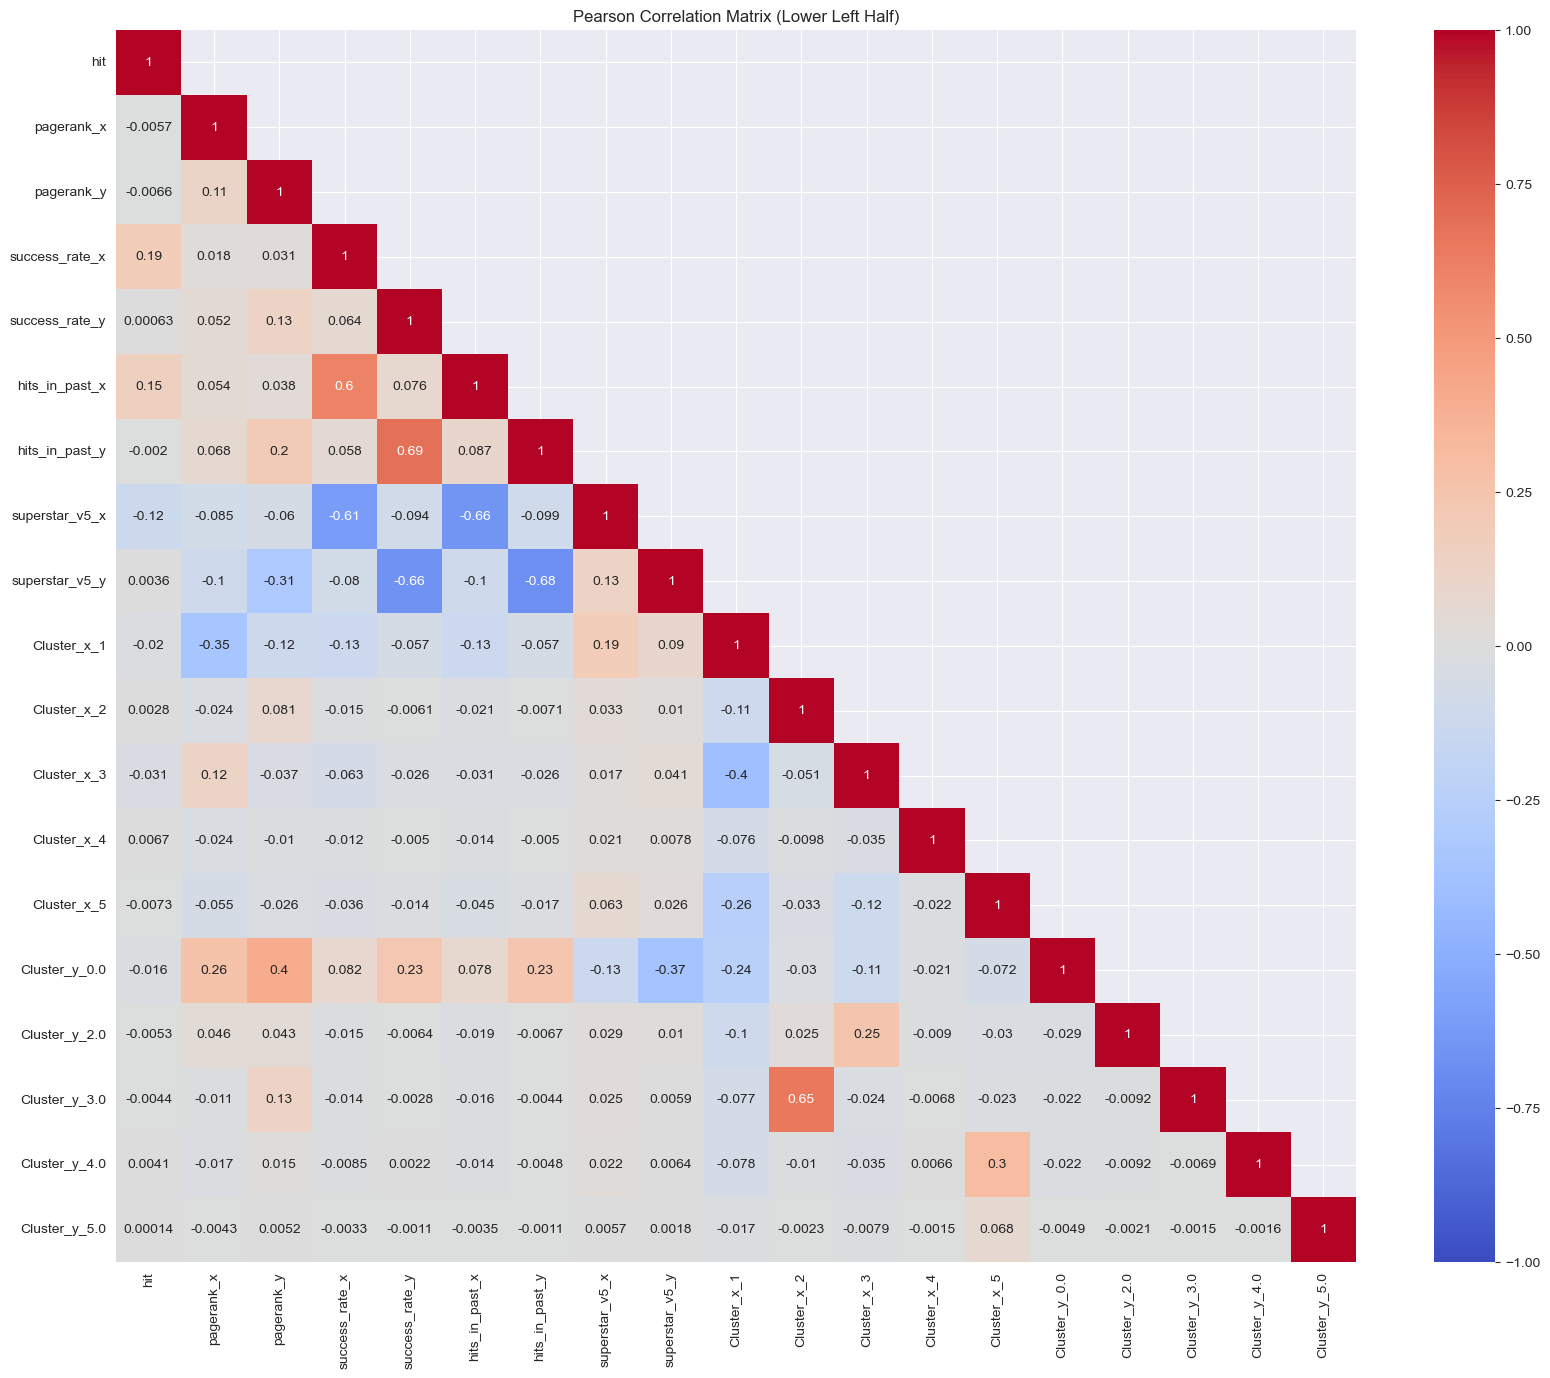

In [8]:
# Assume `data` is your DataFrame and `columns` is the list of columns you want to consider
correlation_matrix = df_one_hot[columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix (Lower Left Half)')
plt.show()

Correlation Matrix:
                     hit  pagerank_x  pagerank_y  success_rate_x  \
hit             1.000000    0.016214   -0.015340        0.114921   
pagerank_x      0.016214    1.000000    0.344086        0.220269   
pagerank_y     -0.015340    0.344086    1.000000        0.087266   
success_rate_x  0.114921    0.220269    0.087266        1.000000   
success_rate_y -0.003764    0.119366    0.329356        0.130137   
hits_in_past_x  0.112749    0.220984    0.084468        0.998346   
hits_in_past_y -0.003769    0.119405    0.329385        0.130192   
superstar_v5_x -0.114000   -0.220572   -0.085640       -0.998674   
superstar_v5_y  0.003780   -0.119399   -0.329382       -0.130193   
Cluster_x_1    -0.020273   -0.910936   -0.293275       -0.187991   
Cluster_x_2     0.002793    0.047068    0.175338       -0.034577   
Cluster_x_3    -0.031335    0.425554   -0.019635       -0.014393   
Cluster_x_4     0.006722    0.009758   -0.021927       -0.020815   
Cluster_x_5    -0.007295    

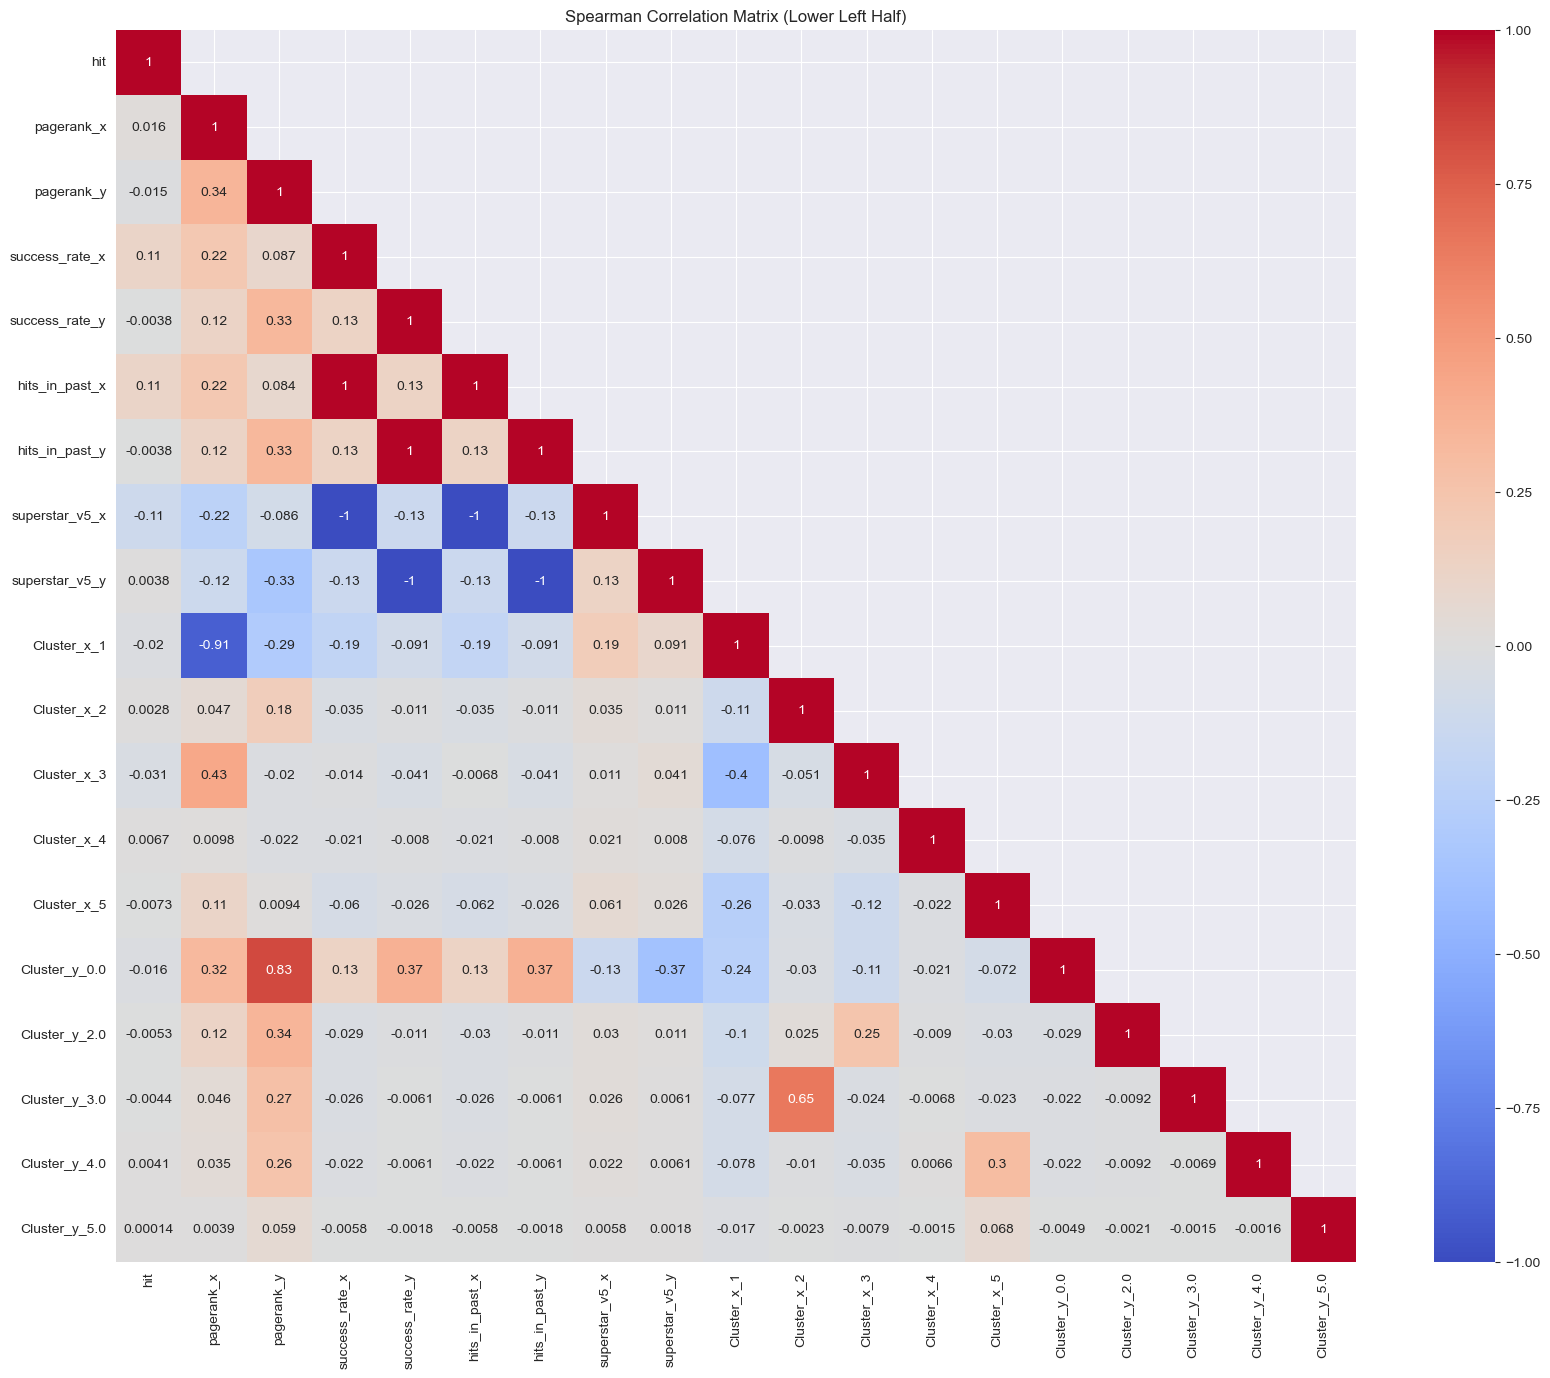

In [9]:
correlation_matrix = df_one_hot[columns].corr(method="spearman")

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix (Lower Left Half)')
plt.show()

plot amount hit songs and successrate of artist by clusters and pagerank as well as superstar var.

## explain on Example of Taylor swift

In [25]:
swift_id = '06HL4z0CvFAxyc27GXpf02'

In [26]:
swift_songs = data_train[(data_train["artist1_id"] == swift_id) | (data_train["artist2_id"] == swift_id)]
swift_songs

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
11455,0RFCHlNuTeUHIB36VuVbOL,"Sweeter Than Fiction - From ""One Chance"" Sound...",43.0,False,Solo,1.0,1.0,79.0,2013-10-21,237640.0,...,1.000000,0.018038,1.000000,0.141463,0.000000,29,0,1,0,2013-10-21
29292,2KrOAg6FftbjgSKdd2a4rS,You Are In Love,54.0,False,Solo,15.0,1.0,76.0,2014-01-01,267107.0,...,1.000000,0.023083,1.000000,0.198113,0.000000,21,0,1,0,2014-01-01
29290,6RvRzl1YJTDnUvdOtV21IK,Wonderland,54.0,False,Solo,14.0,1.0,76.0,2014-01-01,245560.0,...,1.000000,0.023083,1.000000,0.198113,0.000000,21,0,1,0,2014-01-01
28480,0qAIiGFKLdV1xpNlEhjpq8,New Romantics,57.0,False,Solo,16.0,1.0,76.0,2014-01-01,230467.0,...,1.000000,0.023083,1.000000,0.198113,0.000000,21,0,1,0,2014-01-01
28433,0qUnBLZ8bJqUNEeQgayL9t,Out Of The Woods,62.0,False,Solo,4.0,1.0,76.0,2014-01-01,235800.0,...,1.000000,0.023083,1.000000,0.198113,0.000000,21,0,1,0,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270223,7FFfYM4JE1vj5n4rhHxg8q,Babe (feat. Taylor Swift),49.0,False,Collaboration,1.0,2.0,79.0,2018-04-20,215107.0,...,0.061518,1.000000,0.045321,0.000000,0.117647,0,12,0,1,2018-04-20
282983,0SoK5u8MD2VVikNPwXBz74,Babe,56.0,False,Collaboration,15.0,2.0,79.0,2018-06-07,215107.0,...,0.061518,1.000000,0.046994,0.000000,0.116505,0,12,0,1,2018-06-07
282977,0L65Q96BYdbLMvXggkqvQc,Babe - Commentary,22.0,False,Collaboration,14.0,2.0,79.0,2018-06-07,330157.0,...,0.061518,1.000000,0.046994,0.000000,0.116505,0,12,0,1,2018-06-07
283906,2Sy2oGjP5RYB4cLVoDU0Gz,Delicate - Seeb Remix,53.0,False,Collaboration,1.0,2.0,79.0,2018-06-08,173266.0,...,1.000000,0.047145,1.000000,0.114286,0.000000,12,0,1,0,2018-06-08


Taylor Swift's is part of Cluster 1 

In [27]:
swift_songs["num_artists"].value_counts()

num_artists
1.0    170
2.0     12
Name: count, dtype: int64

In [28]:
swift_songs["hit"].value_counts()

hit
0.0    167
1.0     15
Name: count, dtype: int64

alan walker

In [29]:
walker_id = '7vk5e3vY1uw9plTHJAMwjN'
walker_songs = data_train[(data_train["artist1_id"] == walker_id) | (data_train["artist2_id"] == walker_id)]
walker_songs

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
87404,2lfPecqFbH8X4lHSpTxt8l,Fade,65.0,False,Solo,1.0,1.0,79.0,2014-11-19,264014.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2014-11-19
95571,0lMrWcrVXHPEuVBuc0nRzZ,Spectre,64.0,False,Solo,1.0,1.0,79.0,2015-01-06,230635.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2015-01-06
109759,4YhITuwINLCfXYB2WCXbCZ,Force,64.0,False,Solo,1.0,1.0,79.0,2015-04-02,240006.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2015-04-02
149169,7gHs73wELdeycvS48JfIos,Faded,76.0,False,Solo,1.0,1.0,79.0,2015-12-04,212627.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2015-12-04
149337,0RLjnX1vYWvtdThB8LABwo,Faded - Piano Version,47.0,False,Solo,4.0,1.0,79.0,2015-12-04,215080.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2015-12-04
149338,34F4GJFUzPvPJmGrTpyqlZ,Faded (Restrung),51.0,False,Solo,3.0,1.0,79.0,2015-12-04,217053.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2015-12-04
149317,0HmONWWIU1FXkwWLDpqrjl,Faded - Instrumental,54.0,False,Solo,2.0,1.0,79.0,2015-12-04,214013.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2015-12-04
172159,1VNbNTzQS0iIVrlaPXUthv,Faded - Luke Christopher Remix,45.0,False,Collaboration,8.0,2.0,79.0,2016-04-29,206387.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2016-04-29
172180,7MDobIiZKLbDDibHDA1fl8,Faded - Tiesto's Northern Lights Remix,53.0,False,Collaboration,7.0,2.0,79.0,2016-04-29,250280.0,...,0.030303,1.000000,0.359062,0.000000,0.011111,0,1,0,1,2016-04-29
172296,1730zLNltAlPSHgvqGFw7r,Faded - Slushii Remix,45.0,False,Collaboration,2.0,2.0,79.0,2016-04-29,211693.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2016-04-29


In [30]:
walker_songs["num_artists"].value_counts()

num_artists
2.0    24
1.0    13
Name: count, dtype: int64

In [31]:
walker_songs["hit"].value_counts()

hit
0.0    36
1.0     1
Name: count, dtype: int64

get one of the most successfull artists:


In [32]:
data_train.sort_values(by="hits_in_past_x", ascending=False)

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
7236,2fL2Ye0KzmJLQ5RWV2Thxl,All You Need Is Love (Glee Cast Version),38.0,False,Solo,8.0,1.0,53.0,2013-09-23,196507.0,...,1.0,0.012693,1.0,0.091727,0.0,51,0,1,0,2013-09-23
7227,0vQcZwPeF5Ep652lOV1adj,You've Got To Hide Your Love Away (Glee Cast V...,36.0,False,Solo,4.0,1.0,53.0,2013-09-23,163227.0,...,1.0,0.012693,1.0,0.091727,0.0,51,0,1,0,2013-09-23
7206,0AptlXR2zwrHGv8AjaFNm9,Hey Jude (Glee Cast Version),42.0,False,Solo,13.0,1.0,53.0,2013-09-23,291320.0,...,1.0,0.012693,1.0,0.091727,0.0,51,0,1,0,2013-09-23
7194,0aCMDJ8dhgfJQhLNSttRs9,Sgt. Pepper's Lonely Hearts Club Band (Glee Ca...,32.0,False,Solo,12.0,1.0,53.0,2013-09-23,114173.0,...,1.0,0.012693,1.0,0.091727,0.0,51,0,1,0,2013-09-23
7198,0sFg8HTuP3L7Zds4FaooCK,Something (Glee Cast Version),33.0,False,Solo,11.0,1.0,53.0,2013-09-23,181600.0,...,1.0,0.012693,1.0,0.091727,0.0,51,0,1,0,2013-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107595,57slW945pBNBZW0Hq2ZvV9,Rapture,0.0,False,Solo,2.0,1.0,79.0,2015-03-17,203915.0,...,1.0,1.000000,1.0,0.000000,0.0,0,0,0,0,2015-03-17
107573,62HGSVCJAuGpe3UvWJkUi4,Gust of Wind,0.0,False,Solo,8.0,1.0,79.0,2015-03-17,230840.0,...,1.0,1.000000,1.0,0.000000,0.0,0,0,0,0,2015-03-17
107572,0M1kuRzll9uHsYNFWxAN28,Hunter,0.0,False,Solo,7.0,1.0,79.0,2015-03-17,209573.0,...,1.0,1.000000,1.0,0.000000,0.0,0,0,0,0,2015-03-17
107571,5hLE62dWyWqRekuf29Pwjp,It Girl,0.0,False,Solo,6.0,1.0,79.0,2015-03-17,186827.0,...,1.0,1.000000,1.0,0.000000,0.0,0,0,0,0,2015-03-17


since gleecast is not really one artist we chose to use drake instead:

In [33]:
drake_id = '3TVXtAsR1Inumwj472S9r4'
drake_songs = data_train[(data_train["artist1_id"] == drake_id) | (data_train["artist2_id"] == drake_id)]
drake_songs

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
3551,4nYZsbdPt2nozYtWtsV9LM,Live For,18.0,False,Collaboration,6.0,2.0,3.0,2013-09-09,229492.205405,...,0.040685,0.154298,0.049803,0.006849,0.068571,1,12,1,1,2013-09-09
8045,4FcvYEVtmB0UuIPbdzwqsH,Cabaret (feat. Drake),44.0,True,Collaboration,3.0,2.0,79.0,2013-09-27,272747.000000,...,0.043350,0.100310,0.051394,0.115385,0.068182,3,12,1,1,2013-09-27
30394,3IiV2S9VD7L6NbUY8t9PkK,Who Do You Love?,20.0,False,Collaboration,10.0,2.0,2.0,2014-01-01,233547.000000,...,0.028058,1.000000,0.024425,0.000000,0.090361,0,15,0,1,2014-01-01
30386,6lVJb47gQEh3PV585qgRoy,Grindin',47.0,True,Collaboration,1.0,2.0,78.0,2014-01-01,306173.000000,...,0.028058,0.078561,0.024425,0.037037,0.090361,8,15,1,1,2014-01-01
30383,73MbqeKfMZ5KJfNmVn6ysI,Grindin',17.0,False,Collaboration,1.0,2.0,14.0,2014-01-01,306187.000000,...,0.028058,0.078561,0.024425,0.037037,0.090361,8,15,1,1,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289122,2WP8G2pdddDmnh1xbfKBOI,Finesse,66.0,False,Solo,5.0,1.0,79.0,2018-06-29,182080.000000,...,1.000000,0.011928,1.000000,0.179245,0.000000,38,0,1,0,2018-06-29
289114,2G7V7zsVDxg1yRsu7Ew9RJ,In My Feelings,82.0,True,Solo,9.0,1.0,79.0,2018-06-29,217925.000000,...,1.000000,0.011928,1.000000,0.179245,0.000000,38,0,1,0,2018-06-29
289228,44Du2IM1bGY7dicmLfXbUs,Final Fantasy,63.0,True,Solo,12.0,1.0,79.0,2018-06-29,219960.000000,...,1.000000,0.011928,1.000000,0.179245,0.000000,38,0,1,0,2018-06-29
289208,09lmraDvzBT3pUQ2rUtJzK,March 14,60.0,True,Solo,13.0,1.0,79.0,2018-06-29,309560.000000,...,1.000000,0.011928,1.000000,0.179245,0.000000,38,0,1,0,2018-06-29


In [34]:
drake_songs["num_artists"].value_counts()

num_artists
1.0    171
2.0    130
Name: count, dtype: int64

almost half of the songs were collaborations

In [35]:
drake_songs["hit"].value_counts()

hit
0.0    238
1.0     63
Name: count, dtype: int64

In [36]:
drake_hits = drake_songs[drake_songs["hit"] == 1.0]
drake_hits

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
102985,12d5QFwzh60IIHlsSnAvps,10 Bands,64.0,True,Solo,3.0,1.0,79.0,2015-02-12,177733.0,...,1.0,0.032285,1.0,0.070423,0.0,10,0,1,0,2015-02-12
102991,79XrkTOfV1AqySNjVlygpW,Energy,69.0,True,Solo,2.0,1.0,79.0,2015-02-12,181933.0,...,1.0,0.032285,1.0,0.070423,0.0,10,0,1,0,2015-02-12
102989,2durxb17bXcmQJHSt8JAdO,No Tellin',60.0,True,Solo,5.0,1.0,79.0,2015-02-12,310933.0,...,1.0,0.032285,1.0,0.070423,0.0,10,0,1,0,2015-02-12
102987,5InOp6q2vvx0fShv3bzFLZ,Know Yourself,65.0,True,Solo,4.0,1.0,79.0,2015-02-12,275840.0,...,1.0,0.032285,1.0,0.070423,0.0,10,0,1,0,2015-02-12
102986,3a8tAZFJxlmBwOtrf5L1oC,6 God,61.0,True,Solo,7.0,1.0,79.0,2015-02-12,180667.0,...,1.0,0.032285,1.0,0.070423,0.0,10,0,1,0,2015-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289122,2WP8G2pdddDmnh1xbfKBOI,Finesse,66.0,False,Solo,5.0,1.0,79.0,2018-06-29,182080.0,...,1.0,0.011928,1.0,0.179245,0.0,38,0,1,0,2018-06-29
289114,2G7V7zsVDxg1yRsu7Ew9RJ,In My Feelings,82.0,True,Solo,9.0,1.0,79.0,2018-06-29,217925.0,...,1.0,0.011928,1.0,0.179245,0.0,38,0,1,0,2018-06-29
289228,44Du2IM1bGY7dicmLfXbUs,Final Fantasy,63.0,True,Solo,12.0,1.0,79.0,2018-06-29,219960.0,...,1.0,0.011928,1.0,0.179245,0.0,38,0,1,0,2018-06-29
289208,09lmraDvzBT3pUQ2rUtJzK,March 14,60.0,True,Solo,13.0,1.0,79.0,2018-06-29,309560.0,...,1.0,0.011928,1.0,0.179245,0.0,38,0,1,0,2018-06-29


In [37]:
drake_hits["num_artists"].value_counts()

num_artists
1.0    63
Name: count, dtype: int64

of these x songs y are collabs

In [38]:
drake_collab = drake_songs[drake_songs["num_artists"] >= 2.0]
drake_collab

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
3551,4nYZsbdPt2nozYtWtsV9LM,Live For,18.0,False,Collaboration,6.0,2.0,3.0,2013-09-09,229492.205405,...,0.040685,0.154298,0.049803,0.006849,0.068571,1,12,1,1,2013-09-09
8045,4FcvYEVtmB0UuIPbdzwqsH,Cabaret (feat. Drake),44.0,True,Collaboration,3.0,2.0,79.0,2013-09-27,272747.000000,...,0.043350,0.100310,0.051394,0.115385,0.068182,3,12,1,1,2013-09-27
30394,3IiV2S9VD7L6NbUY8t9PkK,Who Do You Love?,20.0,False,Collaboration,10.0,2.0,2.0,2014-01-01,233547.000000,...,0.028058,1.000000,0.024425,0.000000,0.090361,0,15,0,1,2014-01-01
30386,6lVJb47gQEh3PV585qgRoy,Grindin',47.0,True,Collaboration,1.0,2.0,78.0,2014-01-01,306173.000000,...,0.028058,0.078561,0.024425,0.037037,0.090361,8,15,1,1,2014-01-01
30383,73MbqeKfMZ5KJfNmVn6ysI,Grindin',17.0,False,Collaboration,1.0,2.0,14.0,2014-01-01,306187.000000,...,0.028058,0.078561,0.024425,0.037037,0.090361,8,15,1,1,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278338,6vN77lE9LK6HP2DewaN6HZ,Yes Indeed,78.0,True,Collaboration,5.0,2.0,79.0,2018-05-18,142273.000000,...,0.014473,0.176990,0.011420,0.014706,0.200000,1,38,1,1,2018-05-18
289961,7F2Asc2ygbpVSurTCOP8Po,Don’t Matter To Me (with Michael Jackson),32.0,False,Collaboration,10.0,2.0,24.0,2018-06-29,245787.000000,...,0.969697,0.011928,0.853445,0.179245,0.071429,38,1,1,1,2018-06-29
289944,4BmsVfixi6ndJ0pNZlE75D,Talk Up (feat. Jay-Z),28.0,False,Collaboration,11.0,2.0,24.0,2018-06-29,223240.000000,...,1.000000,0.011928,1.000000,0.179245,0.000000,38,0,1,0,2018-06-29
289819,4ksuI04WMvUnJbHQjgs3L5,Talk Up (feat. Jay-Z),63.0,True,Collaboration,11.0,2.0,79.0,2018-06-29,223240.000000,...,1.000000,0.011928,1.000000,0.179245,0.000000,38,0,1,0,2018-06-29


In [39]:
drake_collab["hit"].value_counts()

hit
0.0    130
Name: count, dtype: int64

% of hit songs are collab..